# AdventureWorks Försäljning analys

I denna analys undersöker vi AdventureWorks-databasen för att besvara affärsfrågor som exempelvis:
- Produktkategorier och deras försäljning
- Försäljningstrender över tid
- Regional Försäljning

Använder SQL för att hämta data och Python för visualisering och analys.

In [2]:
import pandas as pd
from src.report import SqlReport
from src.viz import (
    viz_products_per_category,
)
import matplotlib.pyplot as plt

sql_report = SqlReport()

anslutning till sql server lyckades


c:\Users\VBMar\OneDrive\Skrivbord\Python Code\Skola\GitAllowed\SQLInlämning_Marcus\src\io_utiles.py:24: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


In [ ]:
query_1 = """
SELECT TOP 5 *
FROM Person.person
"""
query_1_df = sql_report.query_df(query_1)
query_1_df.head()

In [ ]:

fig ,ax = plt.subplots(figsize=(8,6))



## 1. Antal produkter per kategori

### Affärsfråga
Hur många produkter finns i varje kategori?

### Metod
Jag använder tabellerna:
- Production.ProductCategory  
- Production.ProductSubcategory  
- Production.Product  

Steg:
1. JOIN mellan kategorier, underkategorier och produkter  
2. Räkna DISTINCT ProductID per kategori  
3. Returnera resultatet som en DataFrame och visualisera med ett vertikalt stapeldiagram

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Amount of products'}, xlabel='Product', ylabel='Amount of Products'>)

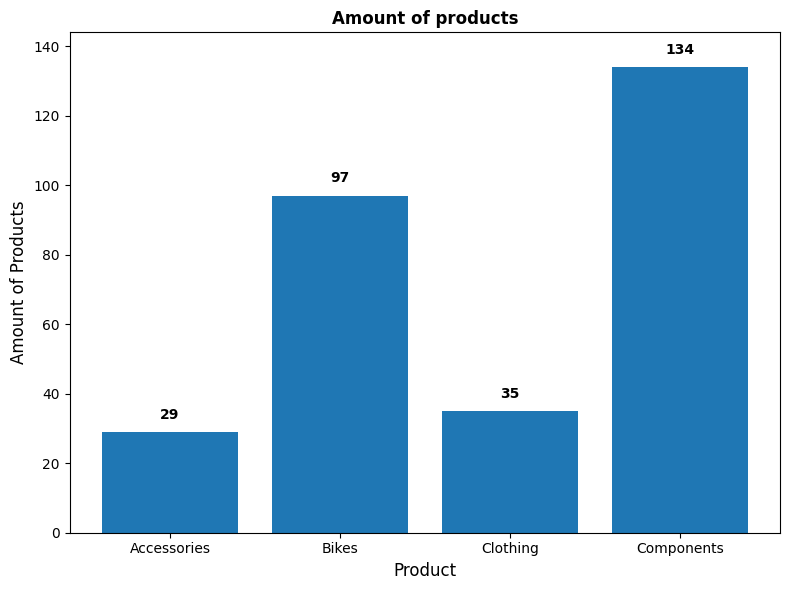

In [5]:
query_category_total = """
SELECT

    pc.Name as Productname,
    COUNT(DISTINCT(p.ProductID)) as amount

FROM Production.ProductCategory as pc
INNER JOIN Production.ProductSubcategory as psc ON  pc.ProductCategoryID = psc.ProductCategoryID
INNER JOIN Production.Product as p on psc.ProductSubcategoryID = p.ProductSubcategoryID 
GROUP BY pc.Name
"""
query_category_total_df = sql_report.query_df(query_category_total)
viz_products_per_category(query_category_total_df)

## Insikter – Antal produkter per kategori

Components är den största kategorin med 134 produkter, följt av Bikes med 97. 
Accessories är den minsta kategorin med endast 29 produkter.

Detta tyder på att företaget har ett brett sortiment inom Components och Bikes, 
medan Accessories är ett betydligt mindre område och kan vara en potentiell utvecklingsmöjlighet.


In [4]:

query_sell_per_category ="""
SELECT

    pc.Name as Productname,
    SUM(sod.LineTotal) as Revenue

FROM Production.ProductCategory as pc
INNER JOIN Production.ProductSubcategory as psc ON  pc.ProductCategoryID = psc.ProductCategoryID
INNER JOIN Production.Product as p on psc.ProductSubcategoryID = p.ProductSubcategoryID 
INNER JOIN Sales.SalesOrderDetail as sod on p.ProductID = sod.ProductID
GROUP BY pc.Name
ORDER BY SUM(sod.LineTotal) DESC
"""
query_sell_per_category_df = sql_report.query_df(query_sell_per_category)
query_sell_per_category_df.head()

,Productname,Revenue
0,Bikes,9.465117e+07
1,Components,1.180259e+07
2,Clothing,2.120543e+06
3,Accessories,1.272073e+06
